In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv('aluguel_uma_variavel_com_ruido.csv')

In [8]:
df.head()

,Area,Preco
0,132,3464.419025
1,136,3326.747554
2,101,2826.127544
3,218,5284.499573
4,50,2162.785902


In [9]:
df.describe()

,Area,Preco
count,500.000000,500.000000
mean,169.464000,4188.225398
std,75.348547,1525.347121
min,30.000000,1128.122076
25%,105.000000,2939.152930
50%,173.000000,4240.232325
75%,231.250000,5463.232332
max,299.000000,7295.186981


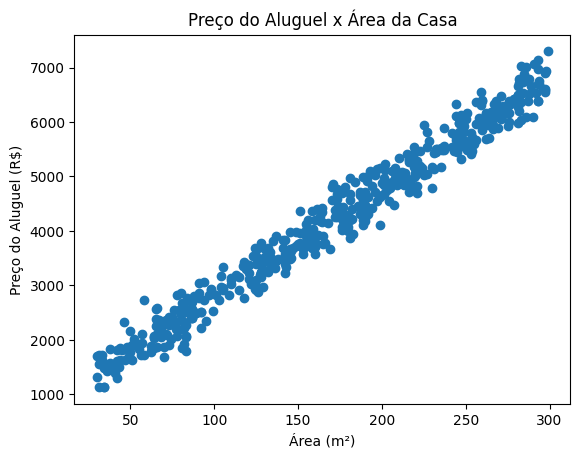

In [10]:
plt.scatter(df['Area'], df['Preco'])
plt.xlabel('Área (m²)')
plt.ylabel('Preço do Aluguel (R$)')
plt.title('Preço do Aluguel x Área da Casa')
plt.show()

In [11]:
def imprimirDFFormatado(df, titulo):
    print(f'Conjunto de {titulo}')
    print(df.to_string(index=False))
    print(df.shape)
    print()

def train_test_split(df, test_size, random_state):
    df = df.sample(frac=1, random_state=random_state)
    n = len(df)
    n_teste = int(test_size * n)
    teste = df.iloc[:n_teste]
    treino = df.iloc[n_teste:]
    return treino, teste    

In [12]:
treino, teste = train_test_split(df, test_size=0.3, random_state=42)
x_treino = treino[['Area']].copy()
y_treino = treino['Preco']
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)
print(f"Modelo Linear: y = {modelo.coef_[0]:.2f}x + {modelo.intercept_:.2f}")

Modelo Linear: y = 19.98x + 794.80


R² treino: 0.97


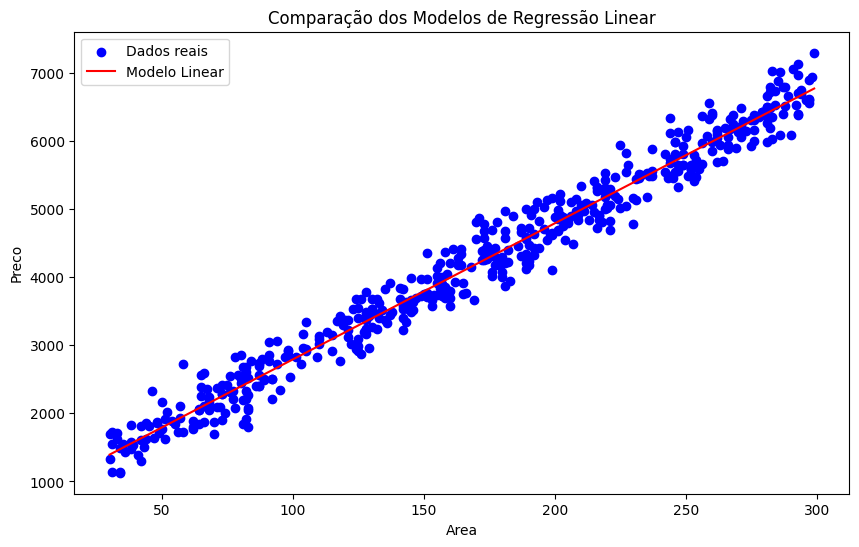

In [13]:
r2_treino = r2_score(y_treino, modelo.predict(x_treino))
print(f'R² treino: {r2_treino:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Preco'], color='blue', label='Dados reais')
areas = np.linspace(df['Area'].min(), df['Area'].max(), 100)

area_df = pd.DataFrame({'Area': areas})
plt.plot(areas, modelo.predict(area_df), label = 'Modelo Linear', color = 'red')
plt.xlabel('Area')
plt.ylabel('Preco')
plt.title('Comparação dos Modelos de Regressão Linear')
plt.legend()
plt.show()